<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-zonas-seg-n-el-peligroClasificador-zonas-segun-el-peligro/blob/main/Correcci%C3%B3n-Laboratorio_3_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [646]:
# Importamos las bibliotecas que sabemos que vamos a usar
%matplotlib inline

import numpy as np, random, array
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [647]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [648]:
# Path de la carpeta donde tenemos los datos ---> Solo hay que cambiar esta parte
folder = "/content/drive/MyDrive/UNI/"

In [649]:
# Carga de datos y mostramos
df = pd.read_csv(folder + "Crimenes.csv")
df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [650]:
# Agrupamos por la columna 'Estado'
grouped=df.groupby(by=['Estado']).sum()

Visualizamos las ciudades con el objetivo de analizar la taza de Asesinatos, asaltos y violaciones, en relación de la más poblada a la menos poblada.
El propósito es clasificar los estados en diferentes categorías  para determinar el nivel de inseguridad, dividiéndolos en zonas de baja peligrosidad y alta peligrosidad.


<Axes: ylabel='Estado'>

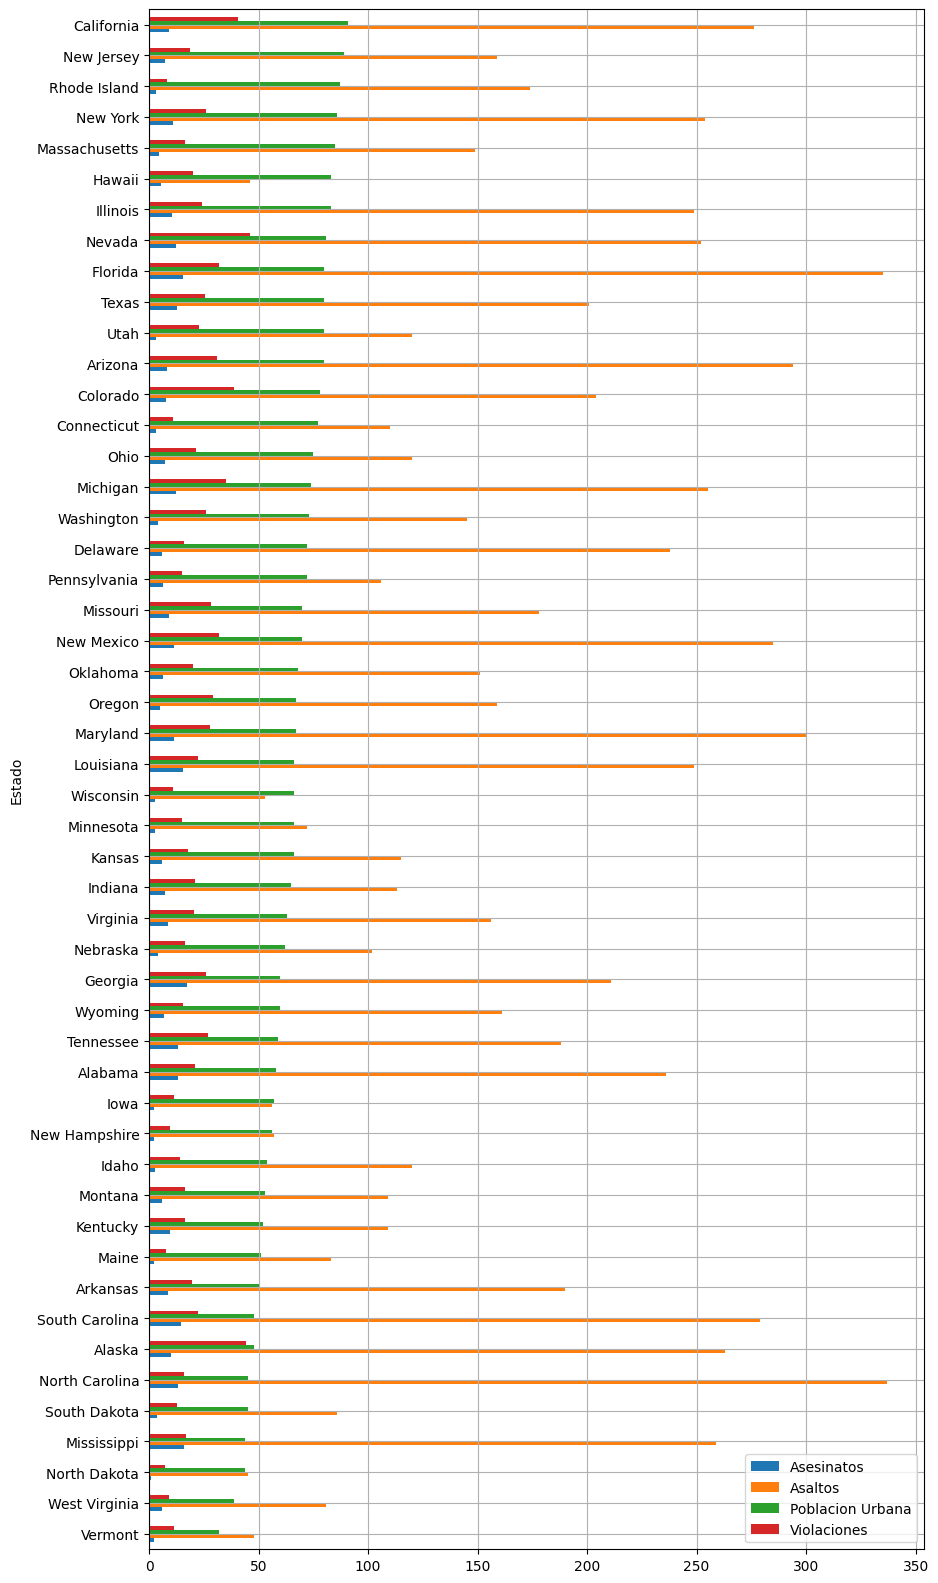

In [651]:
# Creamos un nuevo DataFrame llamado 'features_of_interest' con las columnas específicas del DataFrame agrupado
features_of_interest = pd.DataFrame({'Asesinatos': grouped['Asesinatos'],
                                     'Asaltos': grouped['Asaltos'],
                                     'Poblacion Urbana': grouped['Poblacion Urbana'],
                                     'Violaciones': grouped['Violaciones'],
                                    }
                                   )

# Ordenar el DataFrame por la columna 'Poblacion Urbana' de manera descendente y lo graficamos
features_of_interest.sort_values(by = 'Poblacion Urbana',ascending=True).plot.barh(figsize=(10,20), grid=True)

Del gráfico podemos decir que, si bien las ciudades con mayor población hay mayor número de crímenes. Hay excepciones, ya que fluctúan los datos sin importar el número de habitantes.
En forma general, los asaltos son el tipo de crimen más común, seguido de las violaciones y los asesinatos.

## Averiguar el número óptimo de clusters
El siguiente código busca determinar el número óptimo de clústeres que mejor representan la estructura de los datos, utilizando la medida de inercia (suma de distancias cuadradas) en el método KMeans para diferentes números de clústeres. Esto puede ayudar a identificar la cantidad ideal de grupos para representar los patrones en los datos proporcionados.

In [652]:
# Seleccionar las columnas relevantes del DataFrame 'df' para el análisis de agrupamiento
X = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

# Creamos una instancia del StandardScaler
scaler = StandardScaler()

# Normalizamos los datos utilizando el scaler creado
X_scaled = scaler.fit_transform( X )

# Definir un rango de posibles números de clústeres (de 1 a 19)
cluster_range = range( 1, 20 )

# Inicializamos una lista para almacenar los errores de los clústeres para cada número de clúster
cluster_errors = []

# Iteramos sobre el rango de números de clústeres
for num_clusters in cluster_range:

  # Creamos una instancia de KMeans con el número actual de clústeres y Ajustamos el modelo a los datos normalizados
  clusters = KMeans(n_clusters=num_clusters, n_init=10)
  clusters.fit( X_scaled )

  # Almacenamos la suma de las distancias cuadradas dentro del clúster (inertia) en la lista de errores de clúster
  cluster_errors.append( clusters.inertia_ )

# Creamos un DataFrame con el número de clústeres y los errores asociados y mostramos la primeras 10 filas
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,49.993843
5,6,44.975637
6,7,40.166985
7,8,36.156940
8,9,31.817779
9,10,28.362813


Estos resultados representan la inercia para diferentes números de clústeres. La inercia disminuye a medida que aumenta el número de clústeres, lo cual es común y esperado. Sin embargo, hay un punto donde la disminución se estabiliza significativamente.

Una forma común de determinar el número óptimo de clústeres es utilizando el método del "codo" (Elbow Method). En este caso, se busca el punto en el gráfico donde la disminución de la inercia se asemeja a la curva de un codo, es decir, donde se observa una disminución significativamente menor en la inercia después de ese punto.

A continuación, seleccionamos el número óptimo de clusters utilizando el método del codo al graficar la tabla anterior:

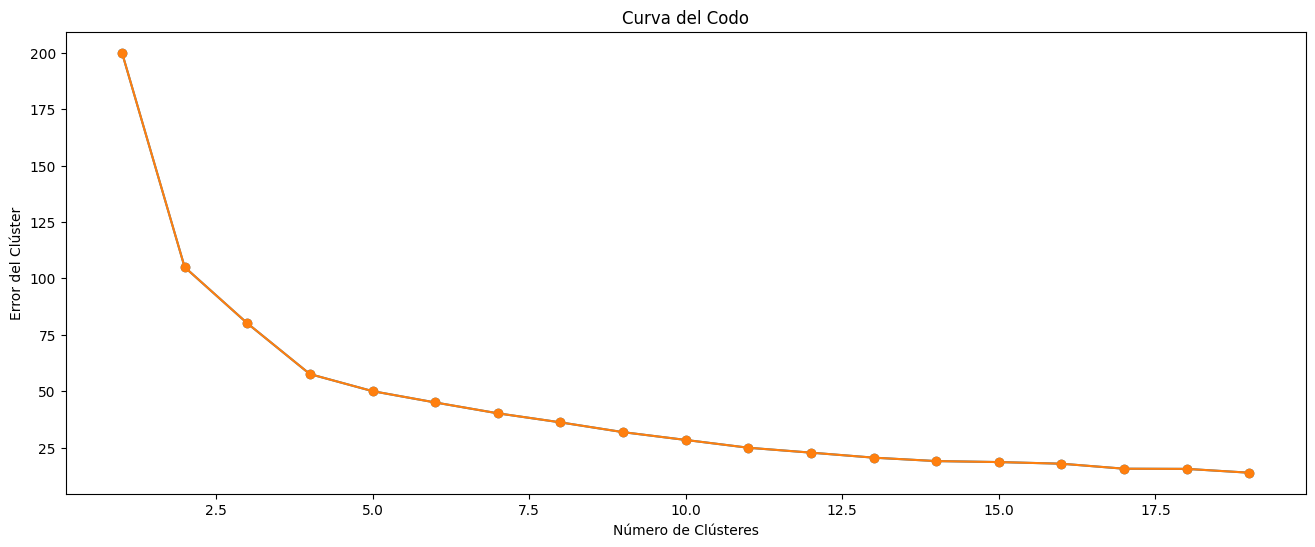

In [653]:
# Establecer el tamaño de la figura y graficamos la curva de codo
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

# Graficamos la curva del codo
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker="o")

# Agregamos etiquetas al gráfico
plt.title('Curva del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Error del Clúster')

# Mostrar el gráfico
plt.show()


In [654]:
X = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Asesinatos,Asaltos,Violaciones,Poblacion Urbana
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


## Analizando los datos por pares

Este gráfico proporciona una visualización rápida de la relación entre 'Asaltos' y 'Assesinatos'

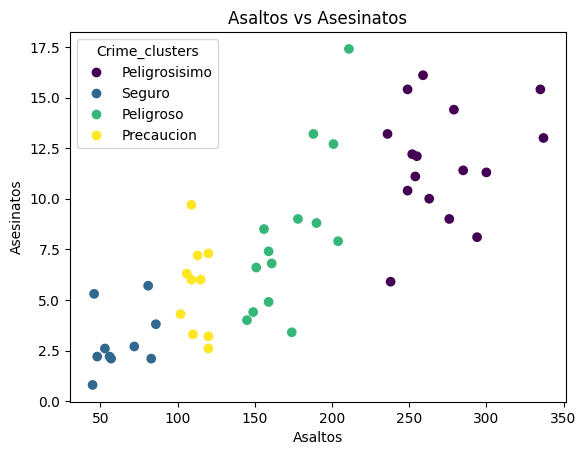

In [655]:
import matplotlib.pyplot as plt

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Graficamos un diagrama de dispersión de 'Asaltos' vs 'Asesinatos' usando colores basados en los clusters
scatter = plt.scatter(df['Asaltos'], df['Asesinatos'], c=df['Crime_clusters'], cmap='viridis')

# Etiquetamos los ejes y agregamos título del gráfico
plt.xlabel('Asaltos')
plt.ylabel('Asesinatos')
plt.title('Asaltos vs Asesinatos')

# Mapeamos los números de clústeres a etiquetas descriptivas
#cluster_labels = {0: 'Precaucion', 1: 'Seguro', 2: 'Peligroso', 3:'Peligrosisimo'}
cluster_labels = {0: 'Peligrosisimo', 1: 'Seguro', 2: 'Peligroso', 3:'Precaucion'}

#cluster_labels = {0: 'Precaucion', 1: 'Seguro', 2: 'Peligroso', 3:'Peligrosisimo'}

# Creamos etiquetas para la leyenda
legend_labels = [cluster_labels[i] for i in range(len(cluster_labels))]

# Agregamos la leyenda basada en los colores de los clusters con las etiquetas descriptivas
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Crime_clusters')

plt.show()


Este gráfico proporciona una visualización rápida de la relación entre 'Asaltos' y 'Violaciones'

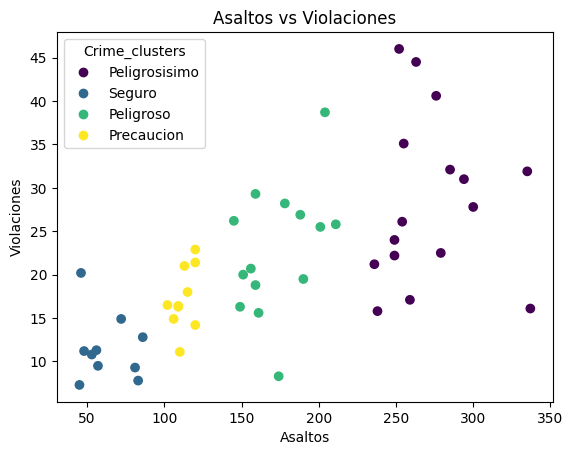

In [656]:
import matplotlib.pyplot as plt

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Graficamos un diagrama de dispersión de 'Asaltos' vs 'Violaciones' usando colores basados en los clusters
scatter = plt.scatter(df['Asaltos'], df['Violaciones'], c=df['Crime_clusters'], cmap='viridis')

# Etiquetamos los ejes y agregamos título del gráfico
plt.xlabel('Asaltos')
plt.ylabel('Violaciones')
plt.title('Asaltos vs Violaciones')

# Mapeamos los números de clústeres a etiquetas descriptivas
cluster_labels = {0: 'Peligrosisimo', 1: 'Seguro', 2: 'Peligroso', 3:'Precaucion'}

# Creamos etiquetas para la leyenda
legend_labels = [cluster_labels[i] for i in range(len(cluster_labels))]

# Agregamos la leyenda basada en los colores de los clusters con las etiquetas descriptivas
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Crime_clusters')


plt.show()

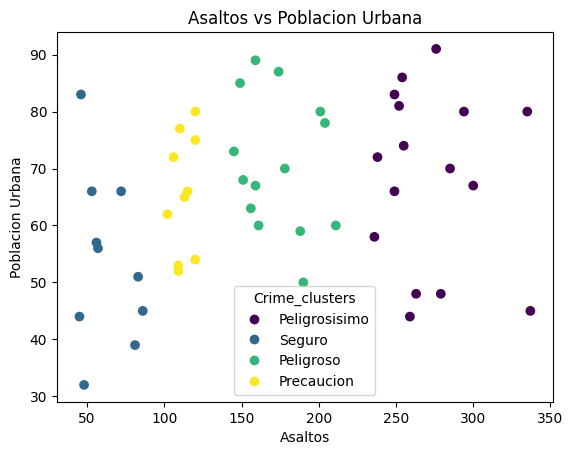

In [657]:
import matplotlib.pyplot as plt

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Graficamos un diagrama de dispersión de 'Asaltos' vs 'Poblacion Urbana' usando colores basados en los clusters
scatter = plt.scatter(df['Asaltos'], df['Poblacion Urbana'], c=df['Crime_clusters'], cmap='viridis')

# Etiquetamos los ejes y agregamos título del gráfico
plt.xlabel('Asaltos')
plt.ylabel('Poblacion Urbana')
plt.title('Asaltos vs Poblacion Urbana')

# Mapeamos los números de clústeres a etiquetas descriptivas
cluster_labels = {0: 'Peligrosisimo', 1: 'Seguro', 2: 'Peligroso', 3:'Precaucion'}

# Creamos etiquetas para la leyenda
legend_labels = [cluster_labels[i] for i in range(len(cluster_labels))]

# Agregamos la leyenda basada en los colores de los clusters con las etiquetas descriptivas
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Crime_clusters')


plt.show()


Este gráfico proporciona una visualización rápida de la relación entre 'Poblacion Urbana' y 'Asaltos'

Menos correlacionado, ya que algunos con bajas poblaciones urbanas tienen un alto número de asaltos.

<Axes: ylabel='Estado'>

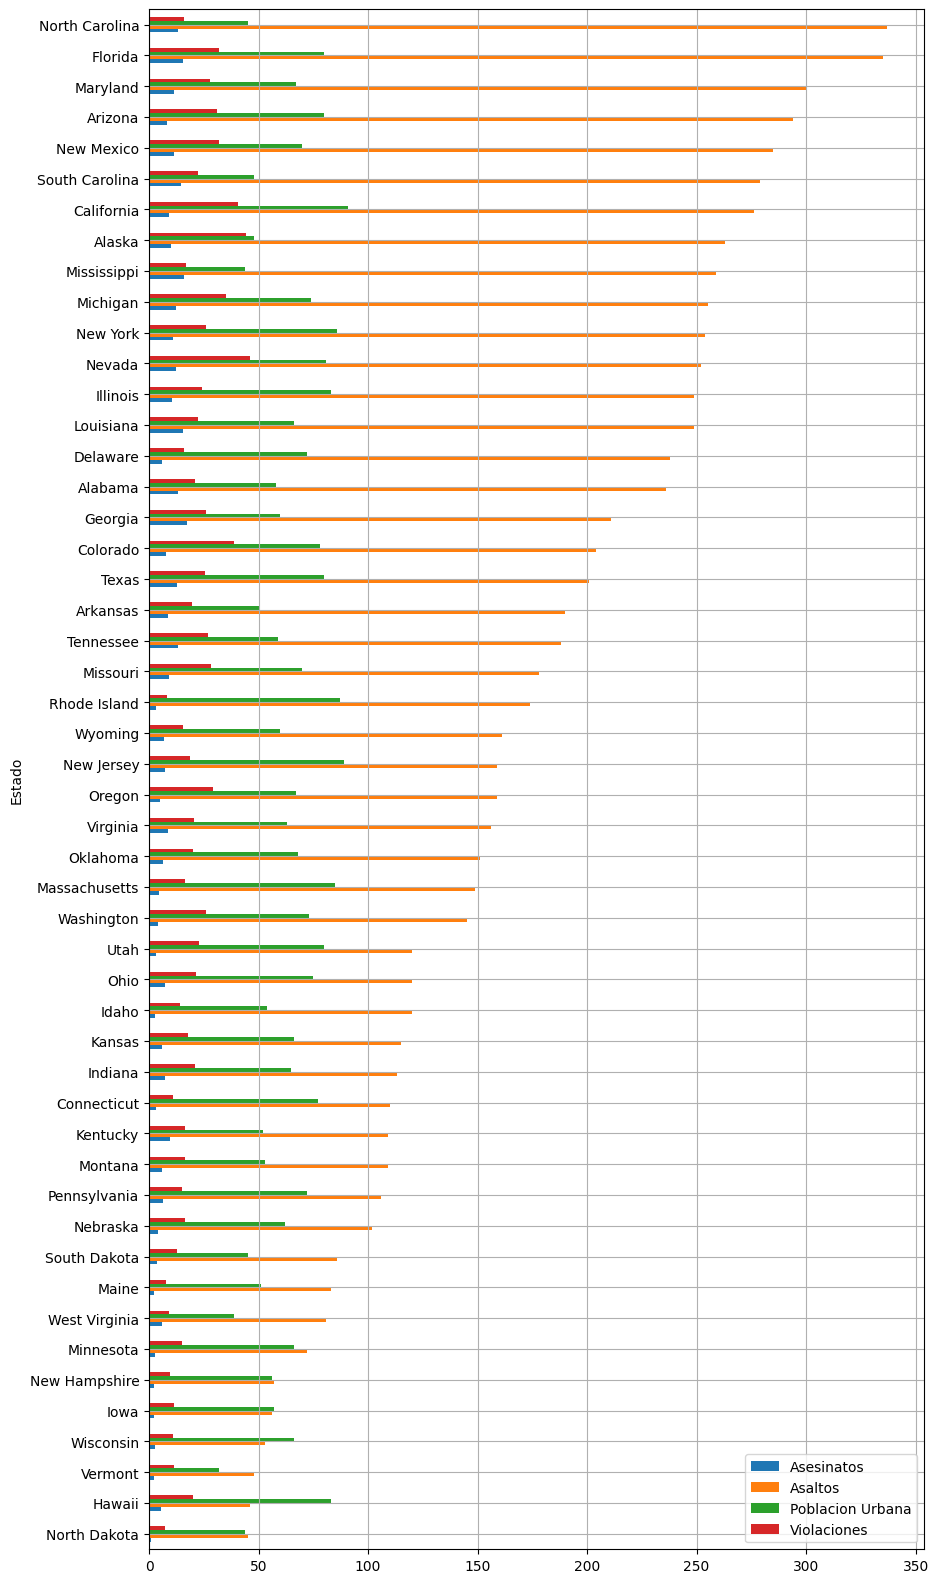

In [658]:
# Organizamos el DataFrame 'features_of_interest' por el número de asaltos de manera ascendente y luego crear un gráfico de barras horizontal
features_of_interest.sort_values(by='Asaltos', ascending=True).plot.barh(figsize=(10,20),grid=True)


## Análisis exploratorio

In [659]:
# Lista de variables en el DataFrame
variable_list = list(df.columns[1:])

# Calculamos el valor medio para cada variable
mean_list = [df[n].mean() for n in variable_list]

# Calculamos la desviación estándar para cada variable
stDev_list = [df[n].std() for n in variable_list]

# Encontramos el valor mínimo para cada variable
min_list = [df[n].min() for n in variable_list]

# Encontramos el valor máximo para cada variable
max_list = [df[n].max() for n in variable_list]

# Crear un DataFrame para almacenar la información de exploración de datos
exploration_table = pd.DataFrame(columns=['Variable', 'Mean', 'StandardDeviation', 'Min', 'Max'])
exploration_table['Variable'] = variable_list
exploration_table['Mean'] = mean_list
exploration_table['StandardDeviation'] = stDev_list
exploration_table['Min'] = min_list
exploration_table['Max'] = max_list

# Mostrar la tabla de exploración de datos
exploration_table


,Variable,Mean,StandardDeviation,Min,Max
0,Asesinatos,7.788,4.355510,0.8,17.4
1,Asaltos,170.760,83.337661,45.0,337.0
2,Poblacion Urbana,65.540,14.474763,32.0,91.0
3,Violaciones,21.232,9.366385,7.3,46.0
4,Crime_clusters,1.360,1.138563,0.0,3.0


* Asesinatos: El promedio es de aproximadamente 7.79, con una dispersión de alrededor de 4.36. Los valores varían entre 0.8 y 17.4.

* Asaltos: La media es de alrededor de 170.76, con una desviación estándar alta de 83.34. Los valores oscilan entre 45.0 y 337.0.

* Población Urbana: La media es de aproximadamente 65.54, con una desviación estándar de 14.47. Los valores varían entre 32.0 y 91.0.

* Violaciones: El promedio es de alrededor de 21.23, con una desviación estándar de 9.37. Los valores oscilan entre 7.3 y 46.0.

* Crime_clusters (Clústeres de Crimen): En promedio, los datos se dividen en 1.36 clústeres, con una desviación estándar de 1.14. Los valores varían entre 0.0 y 3.0.

## Validación

In [660]:
# Seleccionamos las columnas relevantes del DataFrame 'df' y le damos forma al array para que tenga 4 columnas
X = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']].values.reshape(-1,4)

# Imprimimos la forma de los datos
print('Shape of data:' , X.shape)

# Creamos una instancia de StandardScaler
X_sc = StandardScaler().fit_transform(X)

Shape of data: (50, 4)


<ipython-input-661-6018a1c27ae9>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



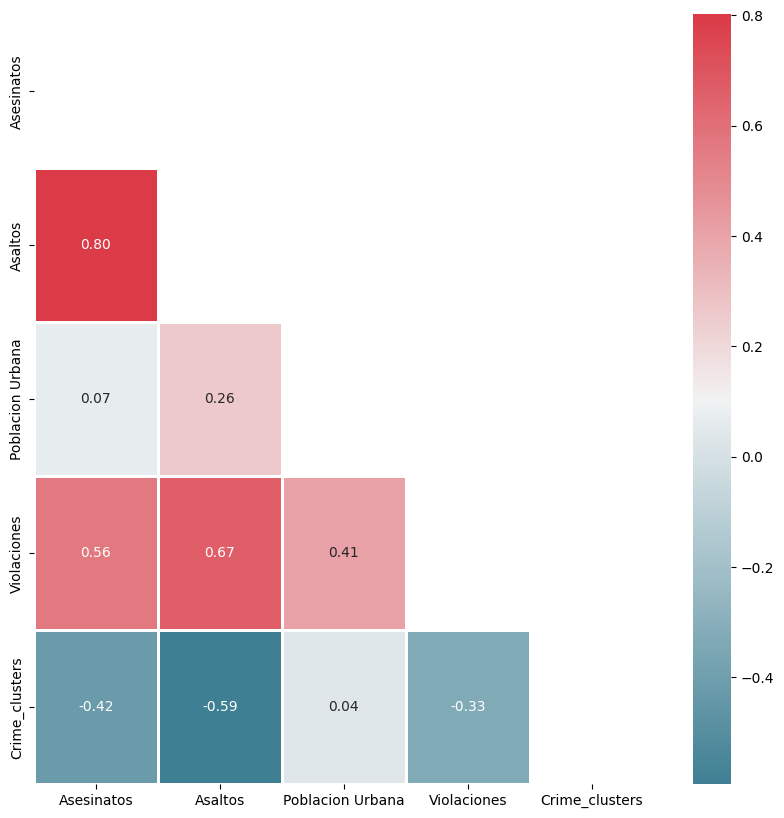

In [661]:
# Definimos un mapa de colores para el mapa de calor
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Funcion para crear el mapa de calor de correlación
def corr_heatmap(df):

    # Calculamos las correlaciones entre las variables del DataFrame
    corrs = df.corr()

    # Creamos una figura y ejes para el mapa de calor
    fig,ax = plt.subplots(figsize=(10,10))

    # Creamos una matriz para enmascarar la mitad superior del mapa de calor
    dropSelf = np.zeros_like(corrs)
    dropSelf[np.triu_indices_from(dropSelf)]=True

    # Creamos el mapa de calor utilizando seaborn
    ax=sns.heatmap(corrs, cmap=colormap, annot=True,
                   fmt='.2f', mask=dropSelf, linewidth=2)

# Llamamos a la función para crear el mapa de calor de correlación
corr_heatmap(df)

## Número óptimo de clústeres (valor de K)

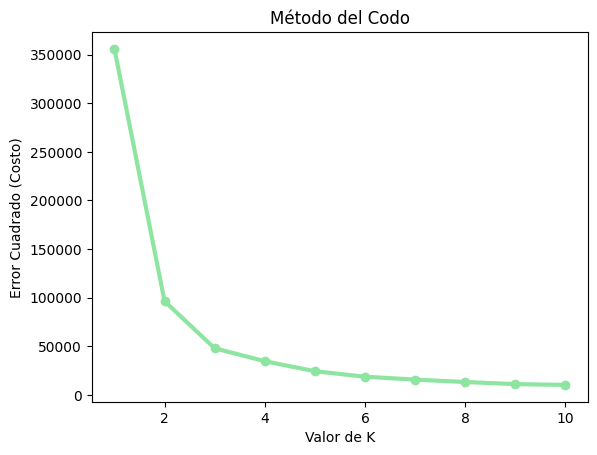

In [662]:
# Creamos lista vacia para almacenar los costos para diferentes valores de k
cost = []

# Iteramos sobre diferentes valores de k (de 1 a 10)
for i in range(1, 11):
    # Creamos una instancia de KMeans con el número actual de clústeres
    KM=KMeans(n_clusters=i, max_iter=500, n_init=10)

    # Ajustamos el modelo a los datos
    KM.fit(X)

    # Calculamos el costo (suma de errores cuadrados) para los puntos agrupados
    cost.append(KM.inertia_)

# Gaficamos el costo en función de los valores de k
plt.plot(range(1, 11), cost, color='g', linewidth='3', marker='o')
plt.xlabel("Valor de K")
plt.ylabel("Error Cuadrado (Costo)")
plt.title('Método del Codo')
plt.show()

El método del codo ayuda a seleccionar el número óptimo de clústeres observando el cambio en el costo a medida que varía el número de clústeres.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



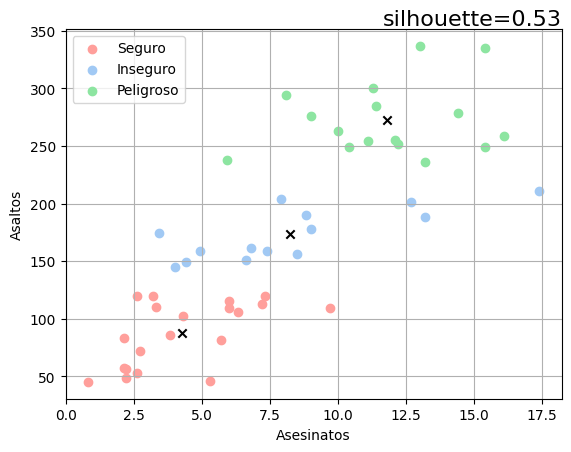

In [663]:
def Kmeans_plot(x, k=3, r=123):
    # Creamos una instancia de KMeans con el número especificado de clústeres
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)

    # Predecimos las etiquetas de clúster para los datos
    y_pred = kmeans.fit_predict(x)

    # Definimos colores para los clústeres
    colors = 'rbgcmy'

    # Mapeamos los números de clústeres a etiquetas descriptivas
    cluster_labels = {0: "Seguro", 1: "Inseguro", 2: "Peligroso"}

    # Graficamos puntos y centroides para cada clúster
    for c in range(k):
        plt.scatter(x[y_pred==c, 0], x[y_pred==c, 1], c=colors[c],
                    label='{}'.format(cluster_labels[c]))
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1],
                   marker='x', color='black')

    # Calculamos el score de la silueta y mostrarlo en el título del gráfico
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'), 2)

    # Graficamos
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Asesinatos')
    plt.ylabel('Asaltos')
    plt.legend()
    plt.grid()
    plt.show()

# Llamamos a la función con los datos 'X', 3 clústeres y semilla aleatoria 0
Kmeans_plot(X, k=3, r=0)


A continución, la tabla muestra los coeficientes de correlación entre las variables. Los valores pueden variar entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica ausencia de correlación lineal.

In [664]:
# Seleccionamos las columnas relevantes para el cálculo de la correlación
variables_correlation = df[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']]

# Calculamos la matriz de correlación entre las variables seleccionadas
variables_correlation.corr()

,Asesinatos,Asaltos,Violaciones,Poblacion Urbana
Asesinatos,1.000000,0.801873,0.563579,0.069573
Asaltos,0.801873,1.000000,0.665241,0.258872
Violaciones,0.563579,0.665241,1.000000,0.411341
Poblacion Urbana,0.069573,0.258872,0.411341,1.000000


La tabla confirma las suposiciones sobre las correlaciones de variables indicadas también por los gráficos. Por ejemplo, el asesinato y el asalto tienen las correlaciones más altas, mientras que el tamaño de la población urbana no es significativo.

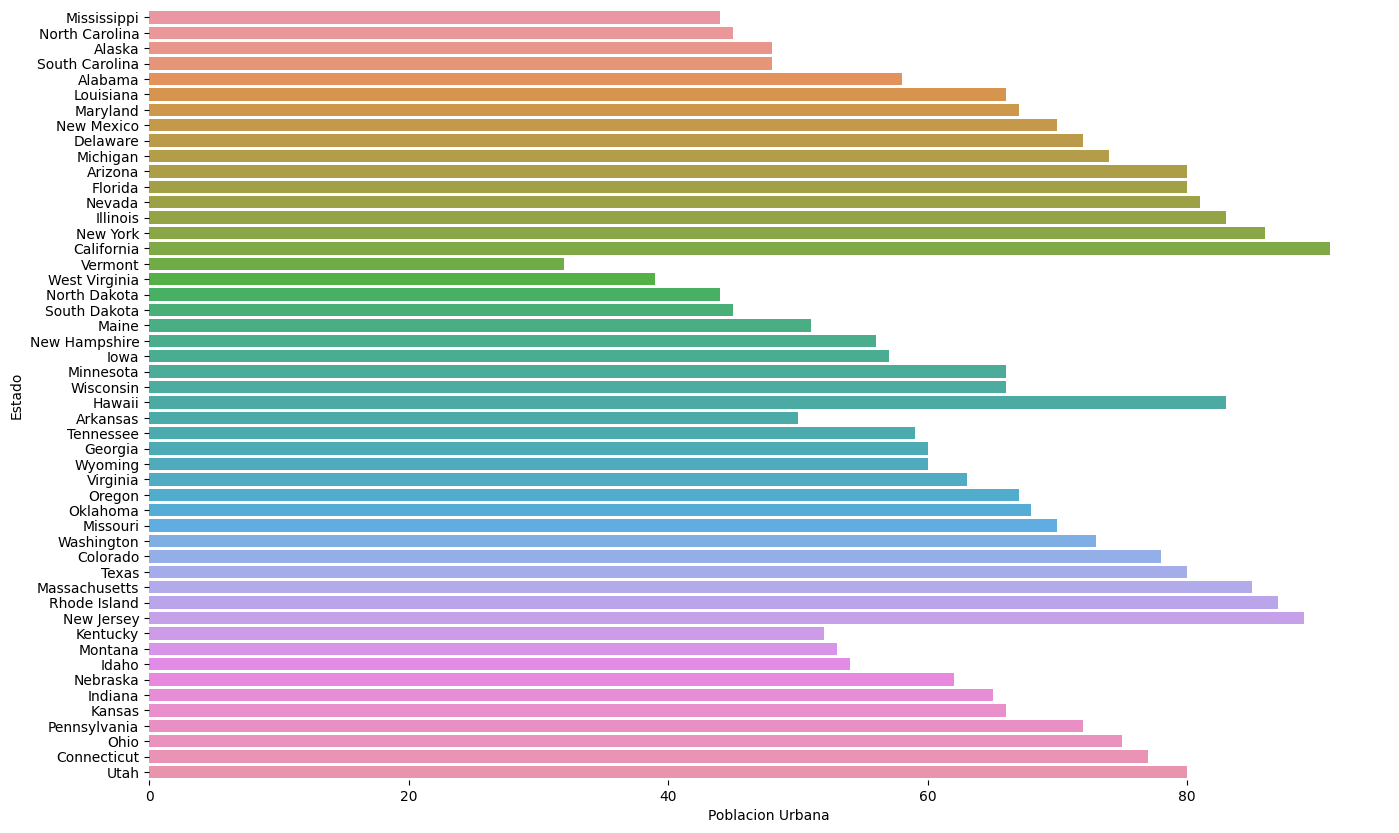

In [665]:
# Inicializamos la figura de matplotlib
f, ax = plt.subplots(figsize=(16, 10))

# Ordenamos el DataFrame por la etiqueta de clúster de crímenes y luego por población urbana en orden ascendente
stats = df.sort_values([ "Crime_clusters", "Poblacion Urbana"], ascending=True)

# Establecemos los códigos de color para el gráfico de barras
sns.set_color_codes("pastel")

# Creamos un gráfico de barras horizontal utilizando seaborn y eliminamos los ejes izquierdo e inferior y mostramos
sns.barplot(y="Estado", x="Poblacion Urbana", data=stats)
sns.despine(left=True, bottom=True)

## Conclusión
No hay diferencias claras y concluyentes entre los cuatro grupos que podrían basarse en las variables disponibles. Por ejemplo, una gran población urbana no lleva automáticamente a tasas de criminalidad más altas. Hawái, por ejemplo, ocupa el sexto lugar en población urbana pero está en el puesto 45 en la tasa total de criminalidad. Por otro lado, Carolina del Norte tenía la segunda tasa de criminalidad más alta pero solo ocupa el puesto 45 en población urbana.

Profundizar en posibles causalidades socioeconómicas y demográficas requeriría un conjunto más amplio de variables, no solo relacionadas con el número de arrestos en cada tipo de crimen. Sin embargo, hubo algunas correlaciones claras entre ciertos tipos de delitos, cuya investigación podría resultar interesante.
